# Numerical Methods in Scientific Computing
# Assignment 4

# Q1.

To compute $\int_0^1e^{x^2}dx$ using Trapezoidal rule and modified Trapezoidal rule.

- Trapezoidal Rule is given by,
\begin{equation}
    \int_{x_0}^{x_N}f(x)dx = \frac{h}{2}\sum_{i=0}^{N-1} [f(x_i)+f(x_{i+1})] + O(h^2)
\end{equation}

- Trapezoidal Rule with end corrections using first derivative is given by,
\begin{equation}
    \int_{x_0}^{x_N}f(x)dx = \frac{h}{2}\sum_{i=0}^{N-1} [f(x_i)+f(x_{i+1})] - \frac{h^2}{2}[f^{\prime}(x_N)-f^{\prime}(x_N)] + O(h^4)
\end{equation}

- Trapezoidal Rule with end corrections using third derivative is given by,

To introduce third derivatives into the end corrections, say
\begin{equation}
    f^{\prime\prime}(y_{i+1}) = a_{-1}f^{\prime}(x_{i}) + a_1f^{\prime}(x_{i+1}) + b_{-1}f^{\prime\prime\prime}(x_{i}) + b_{1}f^{\prime\prime\prime}(x_{i+1})
\end{equation}

By taylor series expansion we have,

\begin{equation}
    f^{\prime}(x_{i}) = f^{\prime}(y_{i+1}) - \frac{h}{2}f^{\prime\prime}(y_{i+1}) + \frac{(\frac{h}{2})^2}{2!}f^{\prime\prime\prime}(y_{i+1}) - \frac{(\frac{h}{2})^3}{3!}f^{\prime\prime\prime\prime}(y_{i+1})+\frac{(\frac{h}{2})^4}{4!}f^{\prime\prime\prime\prime\prime}(y_{i+1})-\frac{(\frac{h}{2})^5}{5!}f^{\prime\prime\prime\prime\prime\prime}(y_{i+1}) + O(h^6)
\end{equation}

\begin{equation}
    f^{\prime}(x_{i+1}) = f^{\prime}(y_{i+1}) + \frac{h}{2}f^{\prime\prime}(y_{i+1}) + \frac{(\frac{h}{2})^2}{2!}f^{\prime\prime\prime}(y_{i+1}) + \frac{(\frac{h}{2})^3}{3!}f^{\prime\prime\prime\prime}(y_{i+1})+\frac{(\frac{h}{2})^4}{4!}f^{\prime\prime\prime\prime\prime}(y_{i+1})+\frac{(\frac{h}{2})^5}{5!}f^{\prime\prime\prime\prime\prime\prime}(y_{i+1}) + O(h^6)
\end{equation}

\begin{equation}
    f^{\prime\prime\prime}(x_{i}) = f^{\prime\prime\prime}(y_{i+1}) - \frac{h}{2}f^{\prime\prime\prime\prime}(y_{i+1}) + \frac{(\frac{h}{2})^2}{2!}f^{\prime\prime\prime\prime\prime}(y_{i+1}) - \frac{(\frac{h}{2})^3}{3!}f^{\prime\prime\prime\prime\prime\prime}(y_{i+1}) + O(h^4)
\end{equation}

\begin{equation}
    f^{\prime\prime\prime}(x_{i+1}) = f^{\prime\prime\prime}(y_{i+1}) + \frac{h}{2}f^{\prime\prime\prime\prime}(y_{i+1}) + \frac{(\frac{h}{2})^2}{2!}f^{\prime\prime\prime\prime\prime}(y_{i+1}) + \frac{(\frac{h}{2})^3}{3!}f^{\prime\prime\prime\prime\prime\prime}(y_{i+1})+ O(h^4)
\end{equation}

Substituting Taylor series expansions and solving for the coefficients, we have,

\begin{equation}
    a_{1}=-a_{-1}=\frac{1}{h} \quad b_{1}=-b_{-1}=-\frac{h}{24}
\end{equation}

The trailing terms amount to order of $h^4$ and hence the finite difference equation is given by,
\begin{equation}
    \Rightarrow f^{\prime\prime}(y_{i+1}) = \frac{f^{\prime}(x_{i+1}) - f^{\prime}(x_{i})}{h} - \frac{h(f^{\prime\prime\prime}(x_{i+1}) - f^{\prime\prime\prime}(x_{i}))}{24} + O(h^4)
\end{equation}

And by central difference,

\begin{equation}
    f^{\prime\prime\prime\prime}(y_{i+1}) = \frac{f^{\prime\prime\prime}(x_{i+1}) - f^{\prime\prime\prime}(x_{i})}{h} + O(h^2)
\end{equation}

We know,

\begin{equation}
    I_{i+1} = I_{i+1}^{trap} - \frac{h^3}{12}f^{\prime\prime}(y_{i+1}) - \frac{h^5}{480}f^{\prime\prime\prime\prime}(y_{i+1}) + O(h^7)
\end{equation}

Substituting the relevant terms and summing over all i we get,
\begin{equation}
    I = I^{trap} - \frac{h^3}{12}(\frac{f^{\prime}(x_{N}) - f^{\prime}(x_{0})}{h} - \frac{h(f^{\prime\prime\prime}(x_{N}) - f^{\prime\prime\prime}(x_{0}))}{24}) - \frac{h^5}{480}(\frac{f^{\prime\prime\prime}(x_{N}) - f^{\prime\prime\prime}(x_{0})}{h}) + O(h^6)
\end{equation}

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [92]:
def func(N):
    h = 1/N
    X = [h*i for i in range(N+1)]
    F = np.exp(np.power(X,2))
    return X, F

def trap_rule(N):
    h = 1/N
    X, F = func(N)
    I_trap = (h/2)*sum([F[i]+F[i+1] for i in range(0,N)])
    return I_trap
    
def mod_trap_rule_first_der(N):
    h = 1/N
    X, F = func(N)
    F_prime = [0, 0]
    F_prime[0] = np.exp(np.power(X[0],2))*2*X[0]
    F_prime[1] = np.exp(np.power(X[N],2))*2*X[N]
    I_mod_trap1 = (h/2)*sum([F[i]+F[i+1] for i in range(0,N)])-(h**2/12)*(F_prime[1]-F_prime[0])
    return I_mod_trap1

def mod_trap_rule_third_der(N):
    h = 1/N
    X, F = func(N)
    F_1prime = [0, 0]
    F_1prime[0] = np.exp(np.power(X[0],2))*2*X[0]
    F_1prime[1] = np.exp(np.power(X[N],2))*2*X[N]
    F_3prime = [0, 0]
    F_3prime[0] = np.exp(np.power(X[0],2))*2*(4*np.power(X[0],3)+6*X[0])
    F_3prime[1] = np.exp(np.power(X[N],2))*2*(4*np.power(X[N],3)+6*X[N])
    I_mod_trap3 = (h/2)*sum([F[i]+F[i+1] for i in range(0,N)]) - (h**2/12)*(F_1prime[1]-F_1prime[0]) + (h**4/(12*24))*(F_3prime[1]-F_3prime[0]) - (h**4/480)*(F_3prime[1]-F_3prime[0])
    return I_mod_trap3

In [94]:
I_exact = 1.4626517459071816
N_list = [2, 5, 10, 20, 50, 100, 200, 500, 1000]
I_trap = []
I_mod_trap1 = []
I_mod_trap3 = []
for i,N in enumerate(N_list):
    I_trap.append(trap_rule(N))
    I_mod_trap1.append(mod_trap_rule_first_der(N))
    I_mod_trap3.append(mod_trap_rule_third_der(N))

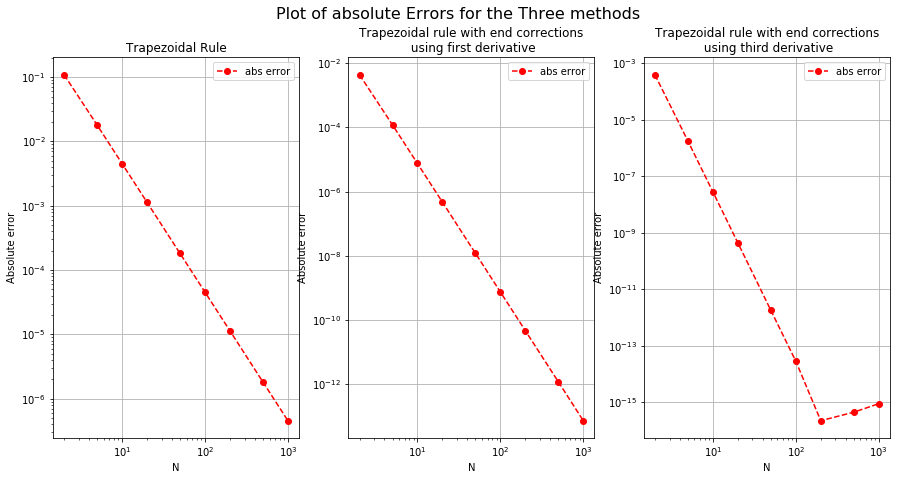

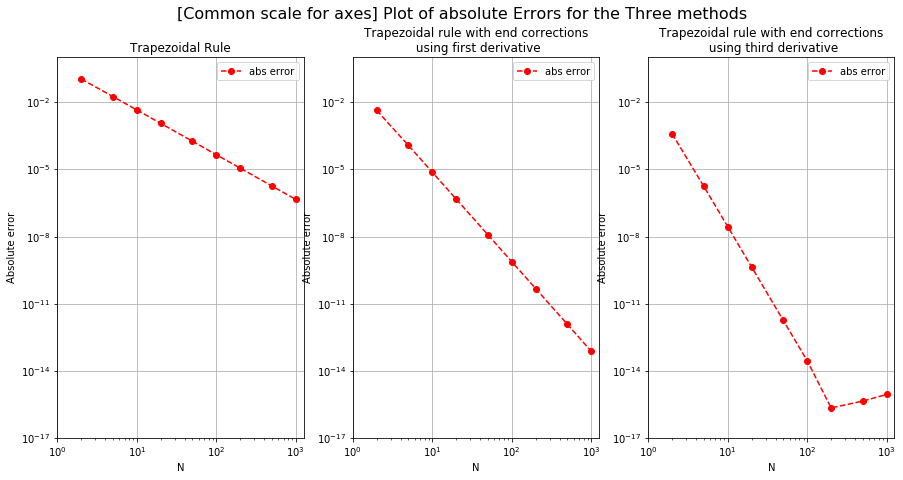

In [111]:
# Plot the results to compare between Numerical and Exact solutions to the ODE for different values of n
fig = plt.figure(figsize=(15,7))
fig.suptitle("Plot of absolute Errors for the Three methods", fontsize=16)
I_numerical = {'Trapezoidal Rule':I_trap,
               'Trapezoidal rule with end corrections using first derivative':I_mod_trap1,
               'Trapezoidal rule with end corrections using third derivative':I_mod_trap3}

for i, method in enumerate(I_numerical):
    plt.subplot(1, 3, i+1)
    plt.loglog(N_list, np.abs(np.subtract(I_numerical[method],I_exact)),
               marker='o',color='r', label="abs error", linestyle='dashed')
    plt.grid()
    plt.legend()
    plt.xlabel('N')
    plt.ylabel('Absolute error')
    plt.title(method if len(method)<35 else method[:37]+'\n'+method[37:])
    
# Plot the results to compare between Numerical and Exact solutions to the ODE for different values of n
fig = plt.figure(figsize=(15,7))
fig.suptitle("[Common scale for axes] Plot of absolute Errors for the Three methods", fontsize=16)
I_numerical = {'Trapezoidal Rule':I_trap,
               'Trapezoidal rule with end corrections using first derivative':I_mod_trap1,
               'Trapezoidal rule with end corrections using third derivative':I_mod_trap3}

for i, method in enumerate(I_numerical):
    plt.subplot(1, 3, i+1)
    plt.loglog(N_list, np.abs(np.subtract(I_numerical[method],I_exact)),
               marker='o',color='r', label="abs error", linestyle='dashed')
    plt.grid()
    plt.legend()
    plt.xlabel('N')
    plt.ylabel('Absolute error')
    plt.title(method if len(method)<35 else method[:37]+'\n'+method[37:])
    plt.xlim(10**0, 10**3+250)
    plt.ylim(10**-17, 10**0)

- Trapezoidal rule - Slope = 4/2 = 2 $\Rightarrow Error is O(1/h^2)$
- Trapezoidal rule with end correction using first derivative- Slope = 8/2 = 4 $\Rightarrow Error is O(1/h^4)$
- Trapezoidal rule with end correction using third derivative- Slope = 12/2 = 6 $\Rightarrow Error is O(1/h^6)$

# Q2.

To obtain $log(n!) = log(C(\frac{n}{e})^n\sqrt{n})+O(1/n)$ using Euler-Macluarin, where C is some constant.

The Euler-Maclaurin Formula is given by,
\begin{equation}
    \sum_{n=a}^{b} f(n) = \int_{a}^{b}f(x)dx + [\frac{f(b)+f(a)}{2}] + \sum_{k=1}^{p} \frac{b_{2k}}{(2k)!} [f^{(2k-1)}(b) - f^{(2k-1)}(a)] - \int_{a}^{b} \frac{B_{2p}(\{t\})}{(2p)!}f^{2p}(t)dt
\end{equation}

\begin{equation}
    log(N!) = \sum_{n=1}^{N} log(n) \Rightarrow f(x) = log(x)
\end{equation}

\begin{equation}
    \sum_{n=1}^{N} log(n) = \int_{1}^{N}log(x)dx + [\frac{log(N)+log(1)}{2}] + \sum_{k=1}^{p} \frac{b_{2k}}{(2k)!} (-1)^{2k-2}(2k-2)!(\frac{1}{N^{2k-1}} - 1) - \int_{1}^{N} \frac{B_{2p}(\{t\})(-1)}{(2p)!t^2}dt
\end{equation}

\begin{equation}
    \sum_{n=1}^{N} log(n) = (Nlog(N)-N+1) + \frac{log(N)}{2} + \sum_{k=1}^{p} \frac{b_{2k}}{(2k)(2k-1)} (-1)^{2k}(\frac{1}{N^{2k-1}} - 1) + (\int_{1}^{\infty} \frac{B_{2p}(\{t\})}{(2p)!t^2}dt - \int_{N}^{\infty} \frac{B_{2p}(\{t\})}{(2p)!t^2}dt)
\end{equation}

\begin{equation}
    \lim_{n \to \infty}( \sum_{n=1}^{N} log(n) - (Nlog(N)-N+1) - \frac{log(N)}{2} )= \lim_{n \to \infty}(\sum_{k=1}^{p} \frac{b_{2k}}{(2k)(2k-1)} (-1)^{2k}(\frac{1}{N^{2k-1}} - 1)) + \lim_{n \to \infty}((\int_{1}^{\infty} \frac{B_{2p}(\{t\})}{(2p)!t^2}dt - \int_{N}^{\infty} \frac{B_{2p}(\{t\})}{(2p)!t^2}dt))
\end{equation}

\begin{equation}
    \lim_{n \to \infty}( \sum_{n=1}^{N} log(n) - (Nlog(N)-N+1) - \frac{log(N)}{2} )= (\sum_{k=1}^{p} \frac{b_{2k}}{(2k)(2k-1)} (-1)^{2k}(-1) + \int_{1}^{\infty} \frac{B_{2p}(\{t\})}{(2p)!t^2}dt) - \lim_{n \to \infty}(\int_{N}^{\infty} \frac{B_{2p}(\{t\})}{(2p)!t^2}dt))
\end{equation}

Taking the following expression as some constant,

\begin{equation}
    (\sum_{k=1}^{p} \frac{b_{2k}}{(2k)(2k-1)} (-1)^{2k}(-1) + \int_{1}^{\infty} \frac{B_{2p}(\{t\})}{(2p)!t^2}dt) = log(C)-1
\end{equation}

While a bound to the following expression is to be found,
\begin{equation}
    (\int_{N}^{\infty} \frac{B_{2p}(\{t\})}{(2p)!t^2}dt))
\end{equation}

Taking p = 1,
\begin{equation}
    B_{2}(\{t\}) = \{t^2\} - \{t\} + \frac{1}{6} \Rightarrow |B_{2}(\{t\})| \lt 3
\end{equation}

So,
\begin{equation}
    |\int_{N}^{\infty} \frac{B_{2}(\{t\})}{(2)!t^2}dt)| \leq \int_{N}^{\infty} \frac{|B_{2}(\{t\})|}{(2)!t^2}dt) \leq \frac{3}{2N}
\end{equation}
which is O(1/N).

\begin{equation}
    \Rightarrow \sum_{n=1}^{N} log(n) = (Nlog(N)-N+1) + \frac{log(N)}{2} + log(C) - 1 + O(1/N) = log((\frac{N}{e})^N) + log(\sqrt{N}) + log(C) + O(1/N)
\end{equation}

\begin{equation}
    \Rightarrow \sum_{n=1}^{N} log(n) = log(C(\frac{N}{e})^N\sqrt{N}) + O(1/N)
\end{equation}

# Q3.

- To evaluate
\begin{equation}
    I_k = \int_{0}^{\pi/2} sin^k(x)dx
\end{equation}

Let $u = sin^{k-1}(x) \Rightarrow du = (k-1)sin^{k-2}(x)cos(x)dx$ and $dv = sin(x)dx \Rightarrow v = -cos(x)$.

\begin{equation}
    I_k = [-sin^{k-1}(x)cos(x)]_0^{\pi/2} + \int_{0}^{\pi/2} (k-1)sin^{k-2}(x)cos^2(x)dx
\end{equation}

With $[-sin^{k-1}(x)cos(x)]_0^{\pi/2} = 0$,


\begin{equation}
    I_k = \int_{0}^{\pi/2} (k-1)sin^{k-2}(x)(1-sin^2(x))dx \Rightarrow I_k = \int_{0}^{\pi/2} (k-1)sin^{k-2}(x)dx + (k-1)I_k
\end{equation}

\begin{equation}
    I_k = \frac{k-1}{k}\int_{0}^{\pi/2} sin^{k-2}(x)dx = \frac{k-1}{k}I_{k-2}
\end{equation}

We can substitute for $I_k$ recursively to find that for when k is even,
\begin{equation}
    I_k = \frac{(n-1)(n-3)...1}{n(n-2)...2}\int_{0}^{\pi/2} sin^{0}(x)dx
\end{equation}

\begin{equation}
    \Rightarrow I_k = \frac{(n-1)(n-3)...1}{n(n-2)...2}\frac{\pi}{2}
\end{equation}

And, when k is odd
\begin{equation}
    I_k = \frac{(n-1)(n-3)...2}{n(n-2)...3}\int_{0}^{\pi/2} sin^{1}(x)dx
\end{equation}

\begin{equation}
    \Rightarrow I_k = \frac{(n-1)(n-3)...2}{n(n-2)...3}
\end{equation}

- From the recursive relation $I_k = \frac{k-1}{k}I_{k-2}$ as $\frac{k-1}{k} \lt 1 \quad \forall k \gt 0$ we have $I_{k} \lt I_{k-2}$. Hence $I_k$ is monotone decreasing sequence.

- $\lim_{m \to \infty} \frac{I_{2m-1}}{I_{2m+1}}$

\begin{equation}
    \lim_{m \to \infty} \frac{I_{2m-1}}{I_{2m+1}} = \lim_{m \to \infty} \frac{I_{2m-1}}{\frac{2m}{2m+1}I_{2m-1}} = \lim_{m \to \infty} \frac{2m+1}{2m} = 1
\end{equation}

- $\lim_{m \to \infty} \frac{I_{2m}}{I_{2m+1}}$

We know that since $I_k$ is monotone decreasing sequence $I_{2m-1} \geq I_{2m} \geq I_{2m+1}$. Dividing throughout by $I_{2m+1}$ we have,

\begin{equation}
    \frac{I_{2m-1}}{I_{2m+1}} \geq \frac{I_{2m}}{I_{2m+1}} \geq \frac{I_{2m+1}}{I_{2m+1}} = 1
\end{equation}

And as $\lim_{m \to \infty} \frac{I_{2m-1}}{I_{2m+1}} = \lim_{m \to \infty} \frac{2m+1}{2m} = 1$, by sandwich theorem,

\begin{equation}
    \lim_{m \to \infty} \frac{I_{2m}}{I_{2m+1}} = 1
\end{equation}

- Central Binomial Coefficient

We know that $\lim_{m \to \infty} \frac{I_{2m}}{I_{2m+1}} = 1$.

\begin{equation}
    \lim_{m \to \infty} \frac{I_{2m}}{I_{2m+1}} = \lim_{m \to \infty} \frac{\frac{(2m-1)(2m-3)...1.\pi}{(2m)(2m-2)...2.2}}{\frac{(2m)(2m-2)...2}{(2m+1)(2m-1)...3}} = \lim_{m \to \infty} (2m+1)(\frac{(2m-1)(2m-3)...3.1}{(2m)(2m-2)...4.2})^2\frac{\pi}{2} = 1
\end{equation}

\begin{equation}
    \Rightarrow \lim_{m \to \infty} \frac{((2m)(2m-2)...4.2)^2}{(2m+1)((2m-1)(2m-3)...3.1)^2} = \frac{\pi}{2}
\end{equation}

Simplifying the expression,
\begin{equation}
    \frac{(m.(m-1)...2.1.2^m)^2}{(2m+1)((2m-1)(2m-3)...3.1)^2} = \frac{(m!)^2.2^{2m}}{(2m+1)((2m-1)(2m-3)...3.1)^2}
\end{equation}

Multiplying and dividing by $((2m)(2m-2)...4.2)^2$
\begin{equation}
    \frac{(m!)^2.2^{2m}.((2m)(2m-2)...4.2)^2}{(2m+1)((2m)(2m-1)(2m-2)(2m-3)...3.2.1)^2} = \frac{(m!)^4.2^{4m}}{(2m+1)(2m!)^2} = \frac{2^{4m}}{(2m+1){2m \choose m}^2}
\end{equation}

\begin{equation}
    \lim_{m \to \infty} \frac{2^{4m}}{(2m+1){2m \choose m}^2} = \frac{\pi}{2} \Rightarrow \lim_{m \to \infty} {2m \choose m} = \lim_{m \to \infty} 2^{2m}\sqrt{\frac{2}{(2m+1)\pi}}
\end{equation}

\begin{equation}
    \Rightarrow {2m \choose m} \sim \frac{4^{m}}{\sqrt{m\pi}}
\end{equation}

- Evaluating C

We know, 
\begin{equation}
    log(2m!) = log(C(\frac{2m}{e})^{2m}\sqrt{2m}) + O(1/2m) \quad;\quad 2.log(m!) = 2log(C(\frac{m}{e})^m\sqrt{m}) + O(1/m)
\end{equation}

\begin{equation}
    log(2m!)-2.log(m!) = log(\frac{C(\frac{2m}{e})^{2m}\sqrt{2m})}{(C(\frac{m}{e})^m\sqrt{m})^2}
\end{equation}

\begin{equation}
    log(\frac{2m!}{m!}) = log(\frac{2^{2m}\sqrt{2}}{C\sqrt{m}})
\end{equation}

\begin{equation}
    \Rightarrow log(\frac{2^{2m}\sqrt{2}}{C\sqrt{m}}) = log(\frac{4^{m}}{\sqrt{m\pi}}) \Rightarrow C = \sqrt{2\pi}
\end{equation}

- Substituting this back into the equation $log(N!) = log(C(\frac{N}{e})^N\sqrt{N}) + O(1/N)$ ,
\begin{equation}
    log(N!) = log(\sqrt{2\pi}(\frac{N}{e})^N\sqrt{N}) + O(1/N)
\end{equation}
   
\begin{equation}
    \Rightarrow N! \sim (\frac{N}{e})^N\sqrt{2\pi N} \quad \text{(Stirling Formula)}
\end{equation}

- $O(1/n^3)$

Including $\frac{b_2.f^{\prime}(x)|_N}{2!} = \frac{1}{12N}$
\begin{equation}
    \Rightarrow \sum_{n=1}^{N} log(n) = log((\frac{N}{e})^N) + log(\sqrt{N}) + log(\sqrt{2\pi}) + O(1/N) = log((\frac{N}{e})^N) + log(\sqrt{N}) + log(\sqrt{2\pi}) + \frac{1}{12N} + O(1/N^3)
\end{equation}

\begin{equation}
    \Rightarrow N! \sim (\frac{N}{e})^N\sqrt{2\pi N}.e^{\frac{1}{12N}}
\end{equation}

In [41]:
# Relative Error for {20, 50}
N = [20, 50]
n = N[0]
factorial_n = scipy.math.factorial(n)
stirling_n = (np.power(n/np.exp(1),n))*np.power(2*np.pi*n, 0.5)
print('The factorial for n = 20 using: \nStirling formula \t=',stirling_n, '\nExact value \t\t=', factorial_n)
print('Relative Error (%)\t=', 100*(stirling_n-factorial_n)/factorial_n)

n = N[1]
factorial_n = scipy.math.factorial(n)
stirling_n = (np.power(n/np.exp(1),n))*np.power(2*np.pi*n, 0.5)
print('The factorial for n = 50 using: \nStirling formula \t=',stirling_n, '\nExact value \t\t=', factorial_n)
print('Relative Error (%)\t=', 100*(stirling_n-factorial_n)/factorial_n)

The factorial for n = 20 using: 
Stirling formula 	= 2.422786846761135e+18 
Exact value 		= 2432902008176640000
Relative Error (%)	= -0.41576526228796995
The factorial for n = 50 using: 
Stirling formula 	= 3.036344593938168e+64 
Exact value 		= 30414093201713378043612608166064768844377641568960512000000000000
Relative Error (%)	= -0.16652563663756476


In [44]:
# Factorial with O(1/n^3)
N = [20, 50]
n = N[0]
factorial_n = scipy.math.factorial(n)
stirling_n = (np.power(n/np.exp(1),n))*np.power(2*np.pi*n, 0.5)*np.exp(1/(12*n))
print('The factorial for n = 20 using: \nStirling formula \t=',stirling_n, '\nExact value \t\t=', factorial_n)
print('Relative Error (%)\t=', 100*(stirling_n-factorial_n)/factorial_n)

n = N[1]
factorial_n = scipy.math.factorial(n)
stirling_n = (np.power(n/np.exp(1),n))*np.power(2*np.pi*n, 0.5)*np.exp(1/(12*n))
print('The factorial for n = 50 using: \nStirling formula \t=',stirling_n, '\nExact value \t\t=', factorial_n)
print('Relative Error (%)\t=', 100*(stirling_n-factorial_n)/factorial_n)

The factorial for n = 20 using: 
Stirling formula 	= 2.432902852332159e+18 
Exact value 		= 2432902008176640000
Relative Error (%)	= 3.469747306463279e-05
The factorial for n = 50 using: 
Stirling formula 	= 3.041409387750502e+64 
Exact value 		= 30414093201713378043612608166064768844377641568960512000000000000
Relative Error (%)	= 2.221968747857392e-06
